In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)

df=pd.read_csv('..\Data\cleaned_googleplaystore.csv')
# df=pd.read_csv('/content/drive/MyDrive/Develhope/Develhope_stage2/data-5---team-4/Stage_2/Data/cleaned_googleplaystore.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task_1 - print(table) the unique names of all categories

In [29]:
pd.DataFrame(df['Category'].unique(), columns=['Category'])

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


## Task_2 - plot a bar chart for categories with the total number of installing numbers in each category 

In [11]:
df[['Category', 'Installs']].groupby('Category', sort=True).agg('sum')

,Installs
Category,
ART_AND_DESIGN,113233100
AUTO_AND_VEHICLES,53129800
BEAUTY,26916200
BOOKS_AND_REFERENCE,1665791655
BUSINESS,697018120
COMICS,44931100
COMMUNICATION,11038241530
DATING,140912410
EDUCATION,189351000


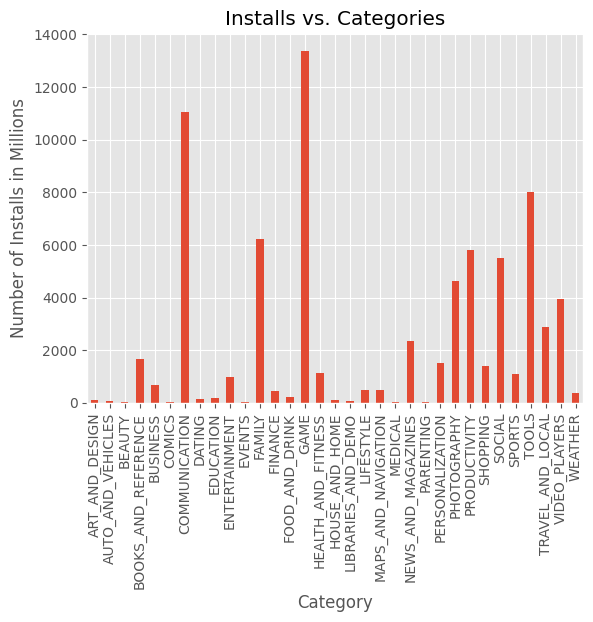

In [27]:
((df[['Category', 'Installs']].groupby(['Category'], sort=True)['Installs'].agg('sum'))/1000000).plot(kind='bar', title='Installs vs. Categories', xlabel="Category", ylabel='Number of Installs in Millions')

plt.show()

## Task_3 - plot a bar chart for the total prices of each paid app in each category (the summation of all prices in the same category)

In [ ]:
# Checking the App Prices
df[['Category','App','Type','Price']].query('Type=="Paid"').sort_values('Category')

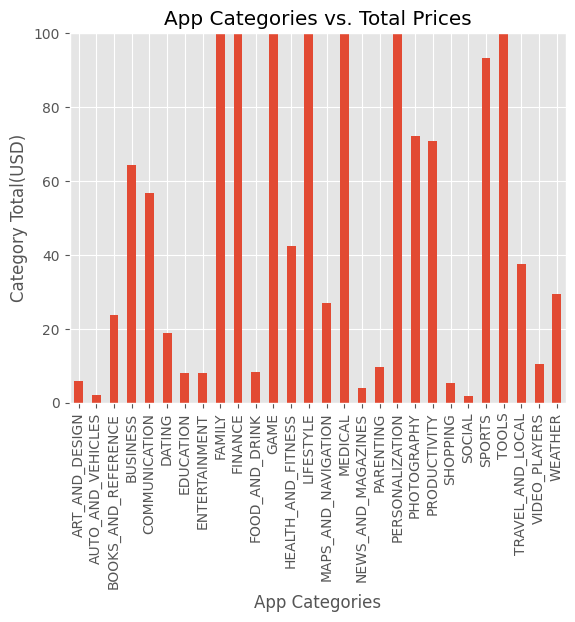

In [ ]:
df[['App','Category','Type','Price']].query('Type=="Paid"') \
    .groupby(['Category'], sort=True)['Price'] \
    .agg('sum').plot(kind="bar", 
                     title='App Categories vs. Total Prices',
                     xlabel='App Categories',
                     ylabel='Category Total(USD)', ylim=(0,100))

plt.show()

## Task_4 - plot a bar chart of the total profit of each category by multiplying the price by the number of installs